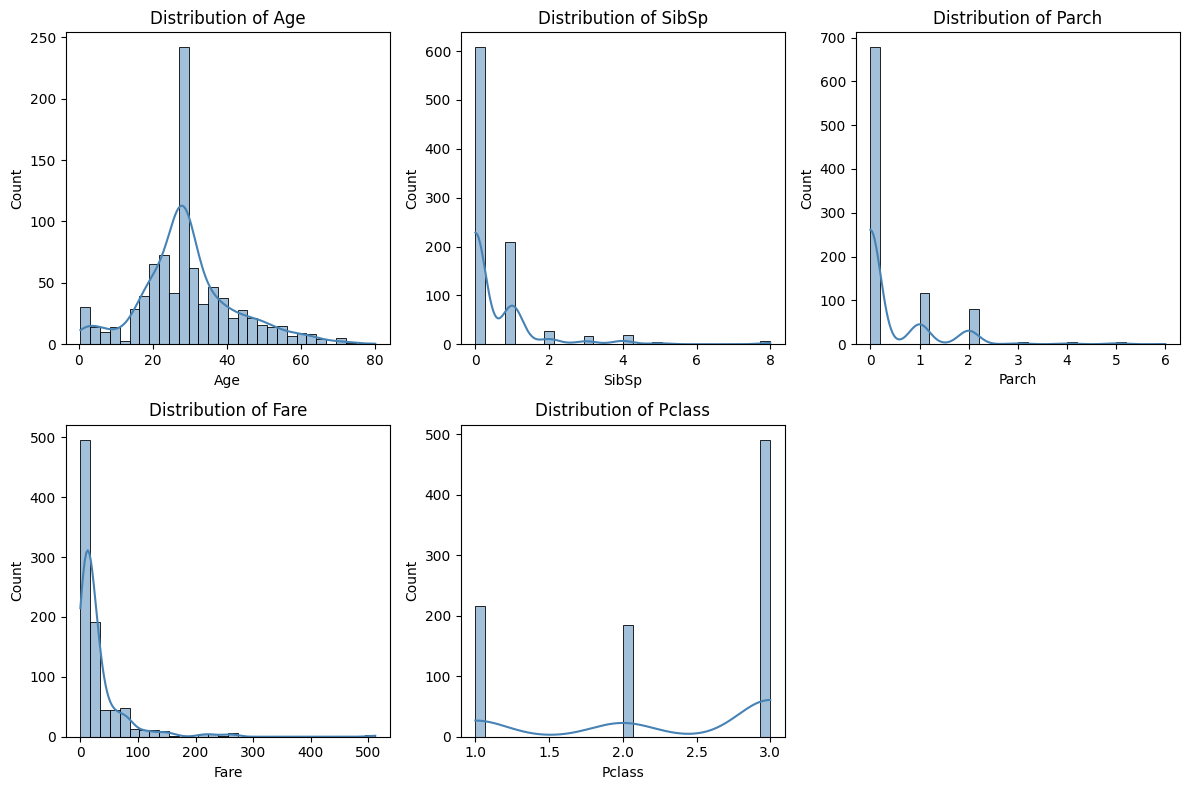

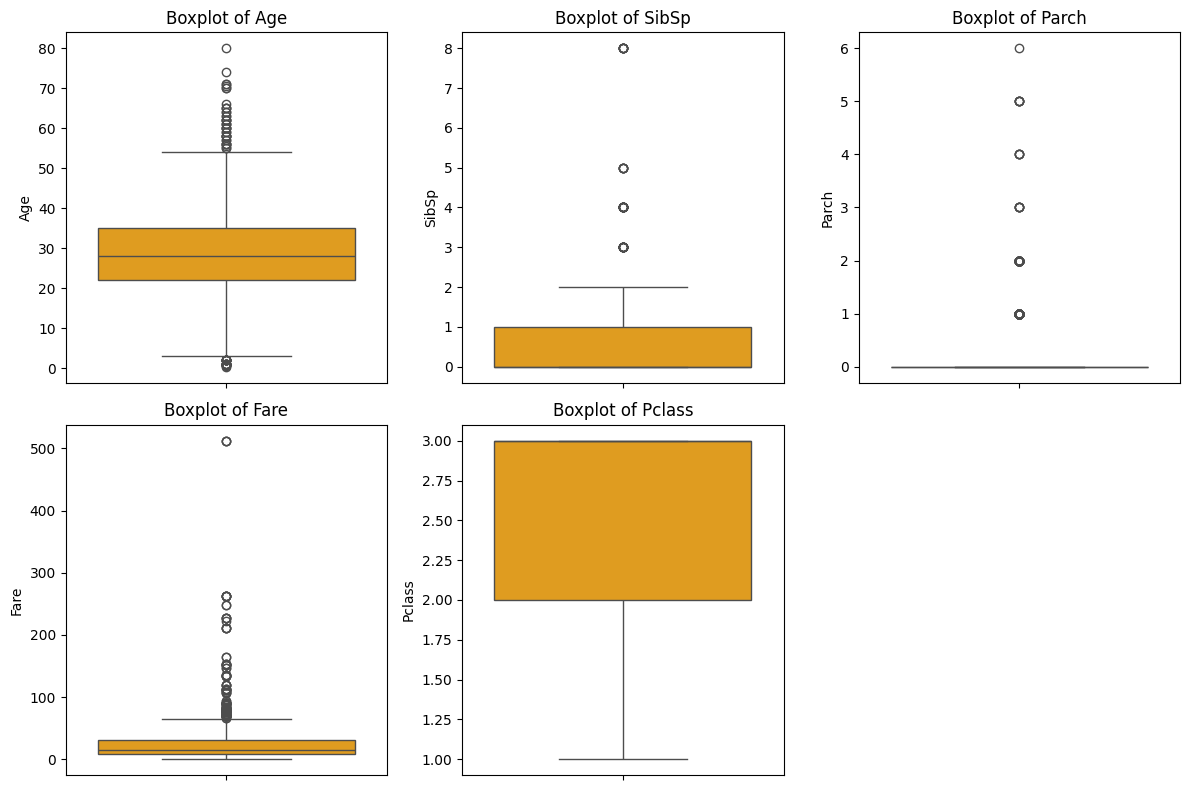

Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.81      0.89      0.85       110
    Survived       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



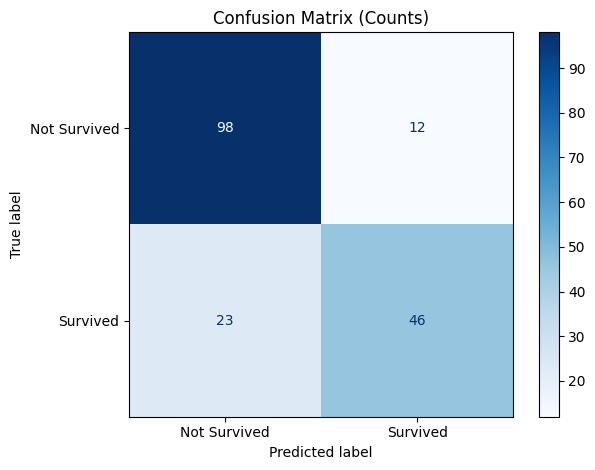

In [7]:
# Logistic Regression on Titanic Dataset (target = Survived)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
)

# ---------------------------------------------------------------------
# 1) Load data
# ---------------------------------------------------------------------
file_path = "/content/drive/MyDrive/APR/Titanic-Dataset.csv"   # change this if needed
df = pd.read_csv(file_path)

# ---------------------------------------------------------------------
# 2) Select features and target
# ---------------------------------------------------------------------
target = "Survived"
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

data = df[features + [target]].copy()

# ---------------------------------------------------------------------
# 3) Handle missing values
# ---------------------------------------------------------------------
num_features = ["Age", "SibSp", "Parch", "Fare", "Pclass"]
cat_features = ["Sex", "Embarked"]

for c in num_features:
    if c in data:
        data[c] = data[c].fillna(data[c].median())

for c in cat_features:
    if c in data:
        data[c] = data[c].fillna(data[c].mode()[0])

X = data[features]
y = data[target].astype(int)

# ---------------------------------------------------------------------
# 4) Data distribution visualization
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 5) Train / test split
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------------------
# 6) Preprocessing + model pipeline
# ---------------------------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
    ],
    remainder="drop",
)

clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("logreg", LogisticRegression(max_iter=1000, solver="lbfgs")),
    ]
)

# ---------------------------------------------------------------------
# 7) Train the model
# ---------------------------------------------------------------------
clf.fit(X_train, y_train)

# ---------------------------------------------------------------------
# 8) Predictions & evaluation
# ---------------------------------------------------------------------
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))

# ---------------------------------------------------------------------
# 9) Confusion matrix (counts only)
# ---------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(values_format="d", cmap="Blues")
plt.title("Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()
